# VacationPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
file = '../output/citiesComplete.csv'
df = pd.read_csv(file)
df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,55.99,79,100,13.00,NZ,1619581507
1,Saint-François,46.4154,3.9054,50.00,93,100,3.44,FR,1619581508
2,Barrow,71.2906,-156.7887,19.40,86,90,3.44,US,1619581508
3,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508
4,Bambous Virieux,-20.3428,57.7575,75.20,94,75,18.41,MU,1619581509


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
gmaps.configure(api_key=g_key)
locations = df[["Lat", "Lng"]]
humidity = df["Humidity"].astype(float)

In [6]:
# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Maps specifications. Added the center, Argelia lat and lng :) 
fig = gmaps.figure(layout=figure_layout, zoom_level=2, center=((28,2)))

# Create heat layer. Added max 100 for the Humidity highest value. 
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100, point_radius=3)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

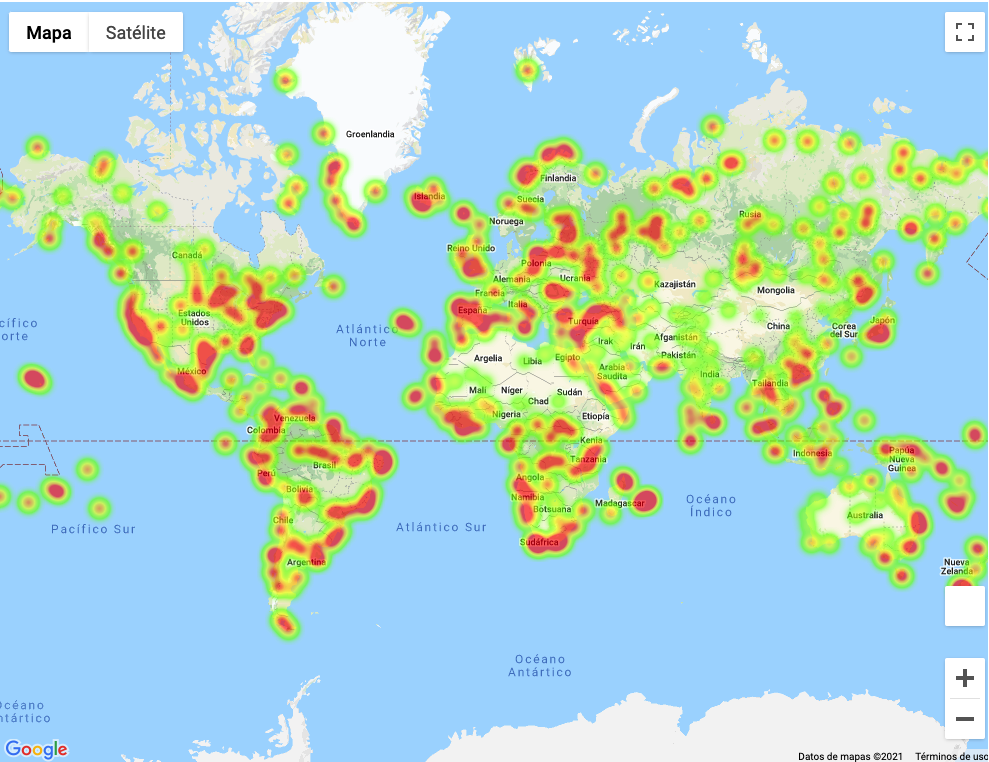


### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [19]:
#In the next exercise I got a warning about adding a new column to a sliced data frame
#So I created a whole new dataframe on this point :) 

weather = pd.DataFrame(df.loc[df["Max Temp"].between(70, 80) & (df['Wind Speed'] <= 10) & (df["Cloudiness"] <50)]) 
weather.dropna()
weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508
9,Airai,-8.9266,125.4092,75.97,35,8,2.04,TL,1619581511
30,Busselton,-33.6500,115.3333,73.00,60,3,4.72,AU,1619581522
36,Touros,-5.1989,-35.4608,75.20,94,40,4.61,BR,1619581524
38,Road Town,18.4167,-64.6167,78.01,84,1,5.99,VG,1619581525


In [24]:
#Droping null values and setting a new index for my clean and ideal weather dataframe 
weather.reset_index(drop=True, inplace=True)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508
1,Airai,-8.9266,125.4092,75.97,35,8,2.04,TL,1619581511
2,Busselton,-33.6500,115.3333,73.00,60,3,4.72,AU,1619581522
3,Touros,-5.1989,-35.4608,75.20,94,40,4.61,BR,1619581524
4,Road Town,18.4167,-64.6167,78.01,84,1,5.99,VG,1619581525


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [34]:
hotel_df = weather 


In [35]:
#Adding the new column name 
hotel_df['Hotel Name'] = ""
hotel_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
0,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508,
1,Airai,-8.9266,125.4092,75.97,35,8,2.04,TL,1619581511,
2,Busselton,-33.6500,115.3333,73.00,60,3,4.72,AU,1619581522,
3,Touros,-5.1989,-35.4608,75.20,94,40,4.61,BR,1619581524,
4,Road Town,18.4167,-64.6167,78.01,84,1,5.99,VG,1619581525,


In [36]:
# params dictionary to update each iteration
params = {
    "radius": 50000,
    "types": "hotel",
    "keyword": "nearest hotel",
    "key": g_key
}

# Use the lat/lng we recovered to identify hotels
for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "Nearest Hotel" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    
    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["results"][0]["name"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.


In [37]:
hotel_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
0,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508,
1,Airai,-8.9266,125.4092,75.97,35,8,2.04,TL,1619581511,
2,Busselton,-33.6500,115.3333,73.00,60,3,4.72,AU,1619581522,Pullman Bunker Bay Resort Margaret River Region
3,Touros,-5.1989,-35.4608,75.20,94,40,4.61,BR,1619581524,Siri Paraíso Hotel
4,Road Town,18.4167,-64.6167,78.01,84,1,5.99,VG,1619581525,


In [38]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [40]:
# Add marker layer ontop of heat map
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Maps specifications. Added the center, Argelia lat and lng :) 
fig = gmaps.figure(layout=figure_layout, zoom_level=2, center=((28,2)))

# Display figure
markers = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

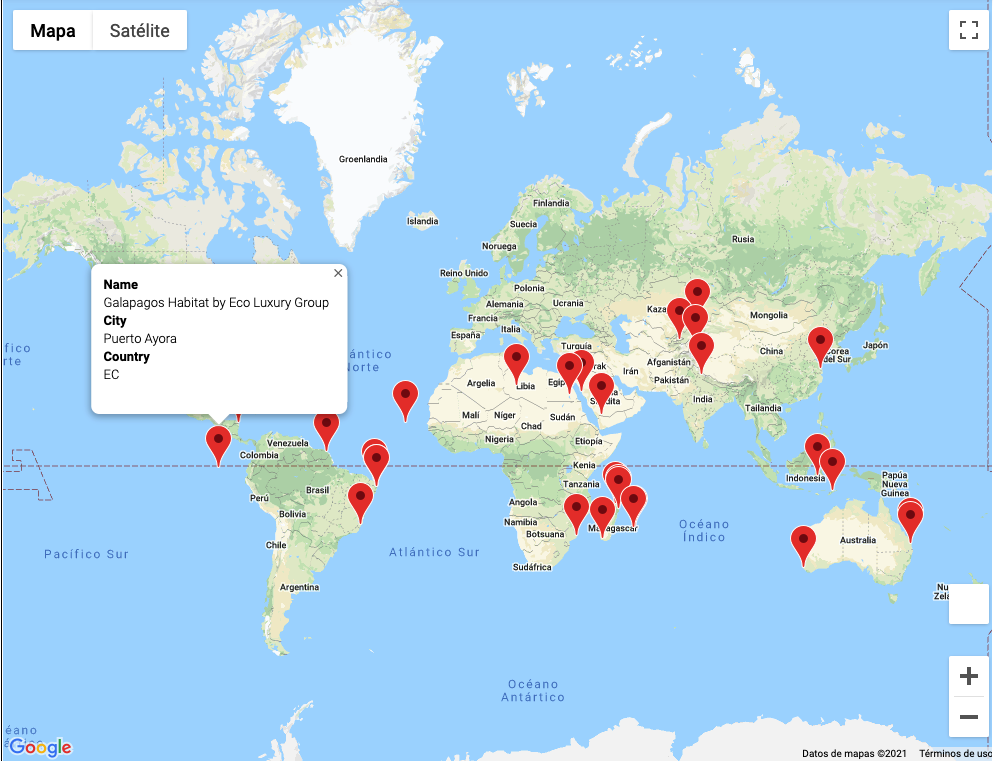